In [1]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split


#Machine Learning Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Machine Learning Evaluation
from sklearn.metrics import precision_score, recall_score

**Loading dataset**

In [2]:
df=pd.read_csv("/content/train_LZdllcl.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
df.shape

(54808, 14)

**DataFrame observation**

In [4]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
for column in df.columns:
  print(column,'---',df[column].unique())
  print('---------------------------')

employee_id --- [65438 65141  7513 ... 13918 13614 51526]
---------------------------
department --- ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
---------------------------
region --- ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
---------------------------
education --- ["Master's & above" "Bachelor's" nan 'Below Secondary']
---------------------------
gender --- ['f' 'm']
---------------------------
recruitment_channel --- ['sourcing' 'other' 'referred']
---------------------------
no_of_trainings --- [ 1  2  3  4  7  5  6  8 10  9]
---------------------------
age --- [35

In [6]:
# Dependent - is_promoted
# Independent -

continuous_columns = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']
category_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel',
                    'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

#Supervised Classification

In [7]:
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

**Data cleaning using pandas**

In [8]:
df.set_index('employee_id', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [10]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [12]:
df.education.fillna("Not Mentioned", inplace = True)
df.previous_year_rating.fillna(0, inplace = True)

In [13]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [14]:
df.duplicated().sum()

118

In [16]:
df.drop_duplicates()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


Hypothesis testing / Statistical analysis

In [17]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)


In [18]:
res=[]
for i in continuous_columns:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)

,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,no_of_trainings,1.253011,1.232,H0-There is no significant difference,-0.021201,0.983087
1,age,34.803915,35.050,H0-There is no significant difference,-0.666523,0.505147
2,length_of_service,5.865512,5.672,H0-There is no significant difference,0.872623,0.382964
3,avg_training_score,63.386750,63.690,H0-There is no significant difference,0.830964,0.406085


In [19]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [20]:
columns=continuous_columns
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)

,column,twosamplettest,t_test_value,P_value,twosamplettest central,t_test_valuone,P_valueone
0,no_of_trainings&age,Ha-There is significant difference,-460.954415,0.0,Ha-There is significant difference,-83.974588,8.348328e-25
1,no_of_trainings&length_of_service,Ha-There is significant difference,-113.099799,0.0,Ha-There is significant difference,-21.791225,2.180192e-14
2,no_of_trainings&avg_training_score,Ha-There is significant difference,-482.612632,0.0,Ha-There is significant difference,-99.072599,4.283120e-26
3,age&length_of_service,Ha-There is significant difference,341.933726,0.0,Ha-There is significant difference,66.894256,4.941083e-23
4,age&avg_training_score,Ha-There is significant difference,-194.612272,0.0,Ha-There is significant difference,-49.345498,1.147951e-20
5,length_of_service&avg_training_score,Ha-There is significant difference,-430.408239,0.0,Ha-There is significant difference,-61.637638,2.142637e-22


In [21]:
def chi_square_test(category_column1,category_column2):
  result={}
  H0_accepted=0
  H0_rejected=0
  data1=pd.crosstab(df[category_column1],df[category_column2])
  observed_values=data1.values
  value=stats.chi2_contingency(observed_values)
  p_value=value[1]
  if p_value<0.05:
     H0_rejected+=1
  else:
    H0_accepted+=1
  if H0_accepted>H0_rejected:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is no relationship between two mentioned column" })
  else:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is relationship between two mentioned column" })

  return result

In [23]:
Category=category_columns
res2=[]
for i in range(len(Category)-1):
  category1=Category[i]
  for j in range(i+1,len(Category)):
      category2=Category[j]
      chi=chi_square_test(category1,category2)
      res2.append(chi)
pd.set_option('max_colwidth', None)
pd.DataFrame(res2)

,column,chi_square_test
0,department&region,There is relationship between two mentioned column
1,department&education,There is relationship between two mentioned column
2,department&gender,There is relationship between two mentioned column
3,department&recruitment_channel,There is relationship between two mentioned column
4,department&previous_year_rating,There is relationship between two mentioned column
5,department&KPIs_met >80%,There is relationship between two mentioned column
6,department&awards_won?,There is no relationship between two mentioned column
7,department&is_promoted,There is relationship between two mentioned column
8,region&education,There is relationship between two mentioned column
9,region&gender,There is relationship between two mentioned column


In [24]:
def annova_test(continous_column,category_column):
   result={}
   H0_accepted=0
   H0_rejected=0
   group=df[category_column].unique()
   grp={}
   for i in group:
     grp[i]=df[continous_column][df[category_column]==i]
   f_value,p_value=stats.f_oneway(*grp.values())
   if p_value<0.05:
    H0_rejected+=1
   else:
     H0_accepted+=1
   if H0_accepted>H0_rejected:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is relationship between mentioned column"})
   else:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is no relationship between mentioned column"})

   return result

In [25]:
Category=category_columns
continous=continuous_columns
res3=[]
for i in continous:
  for j in Category:
    ann=annova_test(i,j)
    res3.append(ann)
pd.DataFrame(res3)

,column,Annova_test
0,no_of_trainings&department,There is no relationship between mentioned column
1,no_of_trainings&region,There is no relationship between mentioned column
2,no_of_trainings&education,There is no relationship between mentioned column
3,no_of_trainings&gender,There is no relationship between mentioned column
4,no_of_trainings&recruitment_channel,There is no relationship between mentioned column
5,no_of_trainings&previous_year_rating,There is no relationship between mentioned column
6,no_of_trainings&KPIs_met >80%,There is no relationship between mentioned column
7,no_of_trainings&awards_won?,There is relationship between mentioned column
8,no_of_trainings&is_promoted,There is no relationship between mentioned column
9,age&department,There is no relationship between mentioned column


In [28]:
df[continuous_columns].corr()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.057275,0.042517
age,-0.081278,1.000000,0.657111,-0.048380
length_of_service,-0.057275,0.657111,1.000000,-0.038122
avg_training_score,0.042517,-0.048380,-0.038122,1.000000


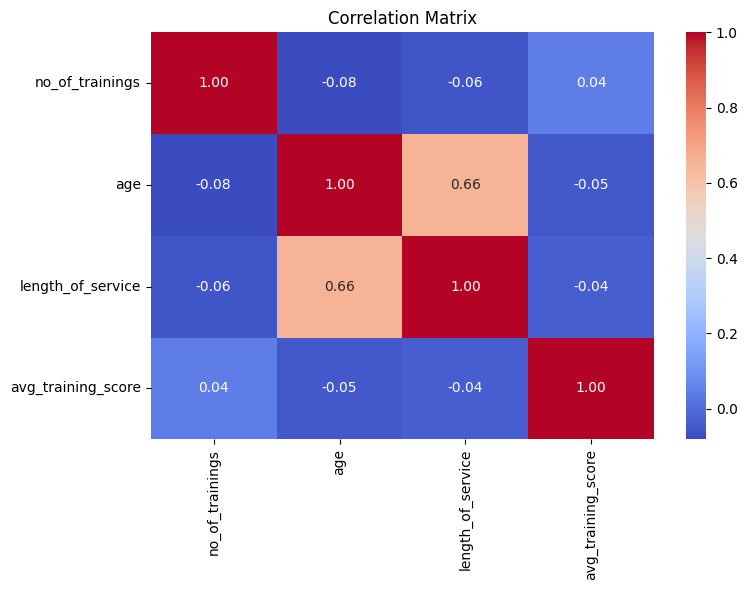

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[continuous_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Data Visualization**

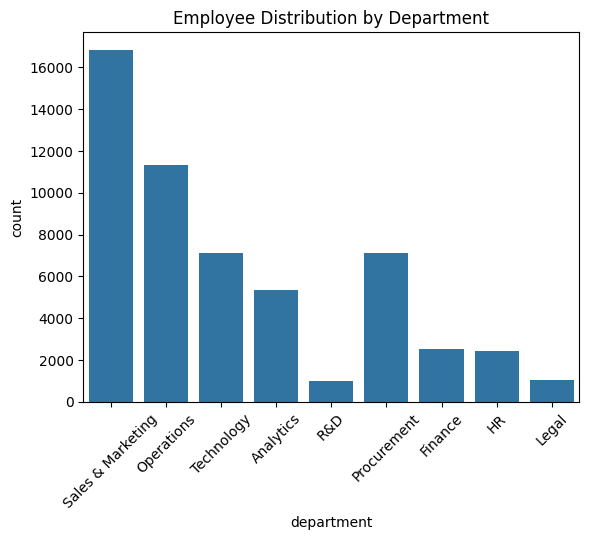

In [30]:
sns.countplot(x='department', data=df)
plt.xticks(rotation=45)
plt.title('Employee Distribution by Department')
plt.show()

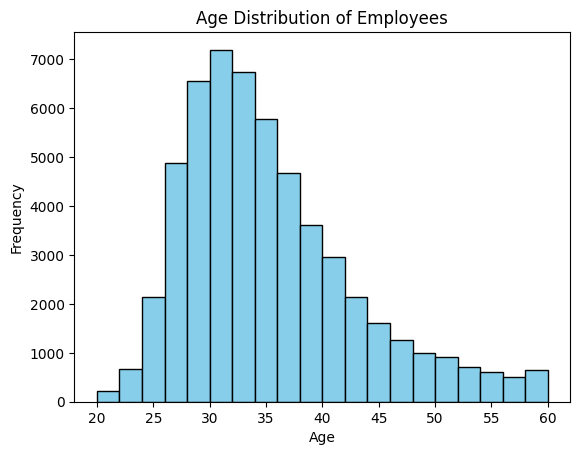

In [31]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Employees')
plt.show()

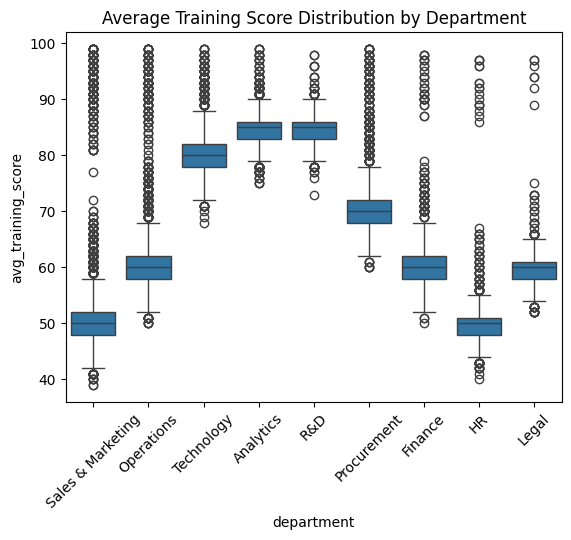

In [32]:
sns.boxplot(x='department', y='avg_training_score', data=df)
plt.xticks(rotation=45)
plt.title('Average Training Score Distribution by Department')
plt.show()

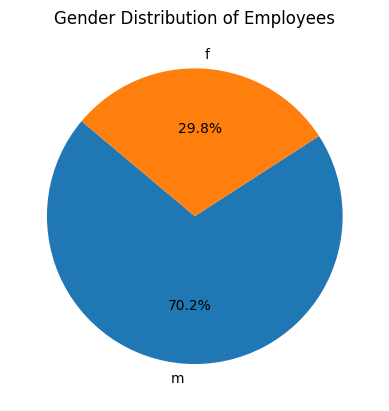

In [33]:
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Employees')
plt.show()

**Preprocessing**

In [34]:
columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
encode = OrdinalEncoder()
before_encoding = {}
after_encoding = {}
encoded = {}

for column in columns:
  before_encoding[column] = df[column].unique()
  df[column] = encode.fit_transform(df[[column]])
  after_encoding[column] = df[column].unique()
  encoded[column] = {before_encoding[column][i]: after_encoding[column][i] for i in range(len(before_encoding[column]))}


In [35]:
for column in columns:
    print(f"Encoded values for column '{column}': {encoded[column]}")

Encoded values for column 'department': {'Sales & Marketing': 7.0, 'Operations': 4.0, 'Technology': 8.0, 'Analytics': 0.0, 'R&D': 6.0, 'Procurement': 5.0, 'Finance': 1.0, 'HR': 2.0, 'Legal': 3.0}
Encoded values for column 'region': {'region_7': 31.0, 'region_22': 14.0, 'region_19': 10.0, 'region_23': 15.0, 'region_26': 18.0, 'region_2': 11.0, 'region_20': 12.0, 'region_34': 27.0, 'region_1': 0.0, 'region_4': 28.0, 'region_29': 21.0, 'region_31': 24.0, 'region_15': 6.0, 'region_14': 5.0, 'region_11': 2.0, 'region_5': 29.0, 'region_28': 20.0, 'region_17': 8.0, 'region_13': 4.0, 'region_16': 7.0, 'region_25': 17.0, 'region_10': 1.0, 'region_27': 19.0, 'region_30': 23.0, 'region_12': 3.0, 'region_21': 13.0, 'region_8': 32.0, 'region_32': 25.0, 'region_6': 30.0, 'region_33': 26.0, 'region_24': 16.0, 'region_3': 22.0, 'region_9': 33.0, 'region_18': 9.0}
Encoded values for column 'education': {"Master's & above": 2.0, "Bachelor's": 0.0, 'Not Mentioned': 3.0, 'Below Secondary': 1.0}
Encoded va

**Machine Learning**

In [36]:
x=df.drop("is_promoted",axis=1)
y=df["is_promoted"]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [38]:
# DecisionTreeClassifier
model_DT=DecisionTreeClassifier().fit(x_train,y_train)
y_pred_DT=model_DT.predict(x_test)

In [39]:
# AdaBoostClassifier
model_Ada=AdaBoostClassifier().fit(x_train,y_train)
y_pred_Ada=model_Ada.predict(x_test)

In [40]:
# DecisionTreeClassifier
ps = precision_score(y_test, y_pred_DT)
rs = recall_score(y_test, y_pred_DT)

ps, rs

(0.4223555888972243, 0.4807856532877882)

In [41]:
# AdaBoostClassifier
ps = precision_score(y_test, y_pred_Ada)
rs = recall_score(y_test, y_pred_Ada)
ps, rs

(0.6795774647887324, 0.16481639624252775)

**Test
Loading test dataset**

In [60]:
test_df=pd.read_csv("/content/test_2umaH9m.csv")

In [61]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [62]:
test_df.shape

(23490, 13)

In [63]:
test_df.set_index('employee_id', inplace=True)

In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23490 entries, 8724 to 5973
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   KPIs_met >80%         23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.3+ MB


In [65]:
test_df.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [66]:
test_df.education.fillna("Not Mentioned", inplace = True)
test_df.previous_year_rating.fillna(0, inplace = True)

In [67]:
test_df.duplicated().sum()

26

In [68]:
test_df.drop_duplicates(inplace = True)

**Preprocessing test dataset**

In [70]:
encode=OrdinalEncoder()
columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
for column in columns:
    test_df[column]=encode.fit_transform(test_df[[column]])

In [71]:
test_df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,8.0,18.0,0.0,1.0,2.0,1,24,0.0,1,1,0,77
74430,2.0,28.0,0.0,0.0,0.0,1,31,3.0,5,0,0,51
72255,7.0,4.0,0.0,1.0,0.0,1,31,1.0,4,0,0,47
38562,5.0,11.0,0.0,0.0,0.0,3,31,2.0,9,0,0,65
64486,1.0,21.0,0.0,1.0,2.0,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
53478,3.0,11.0,1.0,1.0,2.0,1,24,3.0,1,0,0,61
25600,8.0,17.0,0.0,1.0,2.0,1,31,3.0,7,0,0,74
45409,2.0,7.0,0.0,0.0,2.0,1,26,4.0,4,0,0,50


Predicting the promotion

In [72]:
prediction = model_Ada.predict(test_df)

In [73]:
test_df['predicted promotion'] = prediction

In [74]:
test_df['predicted promotion'].value_counts()

predicted promotion
0    22969
1      495
Name: count, dtype: int64

In [75]:
test_df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,predicted promotion
employee_id,,,,,,,,,,,,,
8724,8.0,18.0,0.0,1.0,2.0,1,24,0.0,1,1,0,77,0
74430,2.0,28.0,0.0,0.0,0.0,1,31,3.0,5,0,0,51,0
72255,7.0,4.0,0.0,1.0,0.0,1,31,1.0,4,0,0,47,0
38562,5.0,11.0,0.0,0.0,0.0,3,31,2.0,9,0,0,65,0
64486,1.0,21.0,0.0,1.0,2.0,1,30,4.0,7,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53478,3.0,11.0,1.0,1.0,2.0,1,24,3.0,1,0,0,61,0
25600,8.0,17.0,0.0,1.0,2.0,1,31,3.0,7,0,0,74,0
45409,2.0,7.0,0.0,0.0,2.0,1,26,4.0,4,0,0,50,0
